# Treinamento de Redes Neurais com Keras — Exercícios

- Exercício 1: Classificação Multiclasse (Wine Dataset)
- Exercício 2: Regressão (California Housing Dataset)



In [ ]:
# Célula: Imports e configurações iniciais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
import random

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)
random.seed(SEED)

print('Versão TensorFlow:', tf.__version__)


Versão TensorFlow: 2.19.0


## Exercício 1 — Classificação Multiclasse (Wine Dataset)



In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
data = load_wine(as_frame=True)
X = data.data
y = data.target
print('Shapes:', X.shape, y.shape)
print('Classes:', np.unique(y))
ohe = OneHotEncoder(sparse_output=False)
y_ohe = ohe.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_ohe, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Treino:', X_train_scaled.shape, 'Teste:', X_test_scaled.shape)


Shapes: (178, 13) (178,)
Classes: [0 1 2]
Treino: (142, 13) Teste: (36, 13)


In [ ]:
model_clf = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model_clf.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_clf.summary()

history_clf = model_clf.fit(X_train_scaled, y_train,
                            validation_split=0.15,
                            epochs=80,
                            batch_size=16,
                            verbose=1)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,075 (12.01 KB)

 Trainable params: 3,075 (12.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.4177 - loss: 0.9394 - val_accuracy: 0.6364 - val_loss: 0.8968
Epoch 2/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7877 - loss: 0.7680 - val_accuracy: 0.9091 - val_loss: 0.7343
Epoch 3/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9190 - loss: 0.6481 - val_accuracy: 0.9091 - val_loss: 0.5975
Epoch 4/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9594 - loss: 0.5500 - val_accuracy: 0.9091 - val_loss: 0.4805
Epoch 5/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9594 - loss: 0.4651 - val_accuracy: 0.9091 - val_loss: 0.3821
Epoch 6/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9594 - loss: 0.3894 - val_accuracy: 1.0000 - val_loss: 0.3008
Epoch 7/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9594 - loss: 0.3213 - val_accuracy: 1.0000 - val_loss: 0.2361
Epoch 8/80
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9723 - loss: 0.2628 - val_accuracy: 1.0000 - val_loss: 0.1858


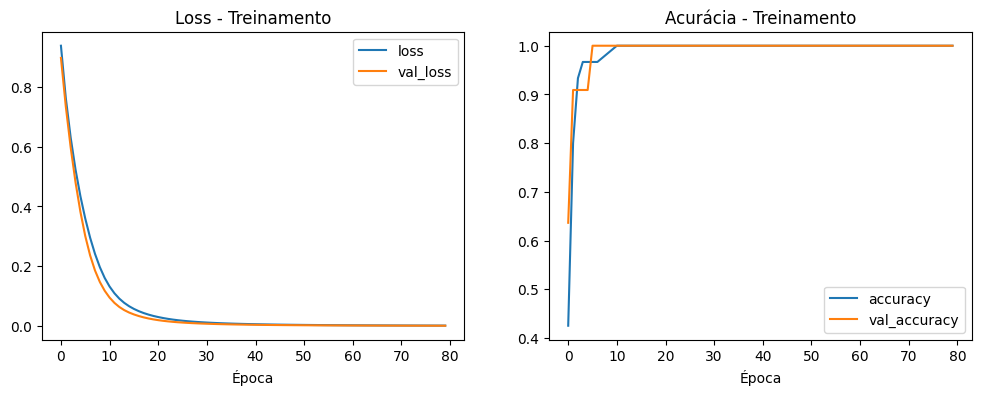

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Acurácia (Keras): 0.9722222222222222

Classification report (Keras):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



In [ ]:
# Avaliação do modelo Keras
hist = history_clf.history
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist['loss'], label='loss')
plt.plot(hist['val_loss'], label='val_loss')
plt.title('Loss - Treinamento')
plt.xlabel('Época')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist['accuracy'], label='accuracy')
plt.plot(hist['val_accuracy'], label='val_accuracy')
plt.title('Acurácia - Treinamento')
plt.xlabel('Época')
plt.legend()
plt.show()
y_pred_proba = model_clf.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test, axis=1)
print('Acurácia (Keras):', accuracy_score(y_true, y_pred))
print('\nClassification report (Keras):\n', classification_report(y_true, y_pred))


In [ ]:
# Comparação com RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
y_int = data.target
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y_int, test_size=0.2, random_state=SEED, stratify=y_int)
rf = RandomForestClassifier(n_estimators=200, random_state=SEED)
rf.fit(X_train_rf, y_train_rf)
y_pred_rf = rf.predict(X_test_rf)

print('Acurácia (RandomForest):', accuracy_score(y_test_rf, y_pred_rf))
print('\nClassification report (RandomForest):\n', classification_report(y_test_rf, y_pred_rf))


Acurácia (RandomForest): 1.0

Classification report (RandomForest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



CONCLUSÃO:

O modelo de rede neural conseguiu classificar corretamente, após o pré-processamento e normalização dos dados. Mesmo com uma arquitetura simples, apresentou boa acurácia, mostrando que redes neurais são eficazes em tarefas de classificação supervisionada.




## Exercício 2 — Regressão (California Housing Dataset)




In [ ]:
# Carregar e preparar dados (California Housing)
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing(as_frame=True)
Xc = cal.data
yc = cal.target
print('Shapes:', Xc.shape, yc.shape)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=SEED)
scaler_c = StandardScaler()
Xc_train_scaled = scaler_c.fit_transform(Xc_train)
Xc_test_scaled = scaler_c.transform(Xc_test)


Shapes: (20640, 8) (20640,)


In [ ]:
# Construir o modelo Keras para regressão
model_reg = keras.Sequential([
    layers.Input(shape=(Xc_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

model_reg.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_reg.summary()

history_reg = model_reg.fit(Xc_train_scaled, yc_train, validation_split=0.15,
                            epochs=120, batch_size=32, verbose=1)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.4334 - mae: 0.8445 - val_loss: 0.4557 - val_mae: 0.4691
Epoch 2/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3998 - mae: 0.4459 - val_loss: 0.3918 - val_mae: 0.4428
Epoch 3/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3578 - mae: 0.4251 - val_loss: 0.3792 - val_mae: 0.4295
Epoch 4/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3427 - mae: 0.4141 - val_loss: 0.3755 - val_mae: 0.4218
Epoch 5/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3373 - mae: 0.4072 - val_loss: 0.3641 - val_mae: 0.4133
Epoch 6/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3237 - mae: 0.3971 - val_loss: 0.3525 - val_mae: 0.4033
Epoch 7/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3137 - mae: 0.3896 - val_loss: 0.3329 - val_mae: 0.3985
Epoch 8/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3077 - mae: 0.3854 - val_loss: 0.3339 - val_mae: 0.3960
Epoch 9/120
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

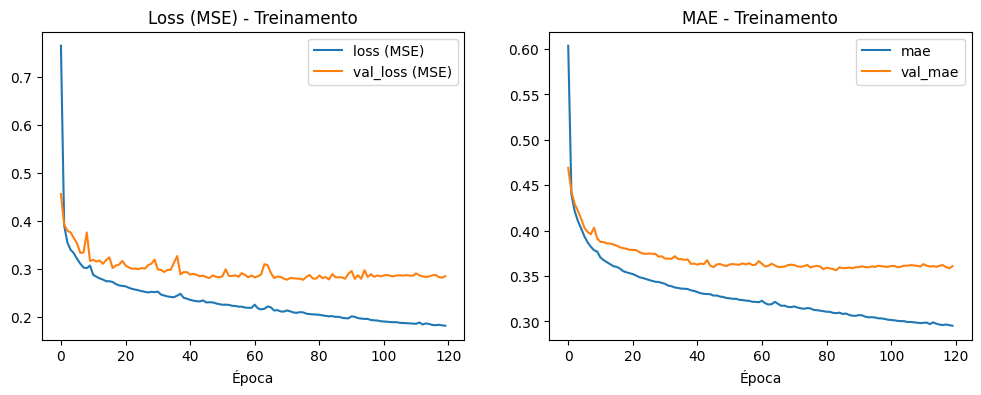

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MSE (Keras): 0.2801
MAE (Keras): 0.3576
R2  (Keras): 0.7863


In [ ]:
# Avaliação do modelo de regressão
hist_r = history_reg.history
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist_r['loss'], label='loss (MSE)')
plt.plot(hist_r['val_loss'], label='val_loss (MSE)')
plt.title('Loss (MSE) - Treinamento')
plt.xlabel('Época')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_r['mae'], label='mae')
plt.plot(hist_r['val_mae'], label='val_mae')
plt.title('MAE - Treinamento')
plt.xlabel('Época')
plt.legend()
plt.show()
y_pred_reg = model_reg.predict(Xc_test_scaled).ravel()
mse = mean_squared_error(yc_test, y_pred_reg)
mae = mean_absolute_error(yc_test, y_pred_reg)
r2 = r2_score(yc_test, y_pred_reg)
print(f'MSE (Keras): {mse:.4f}')
print(f'MAE (Keras): {mae:.4f}')
print(f'R2  (Keras): {r2:.4f}')


In [ ]:
# Comparação com LinearRegression
lr = LinearRegression()
lr.fit(Xc_train_scaled, yc_train)
y_pred_lr = lr.predict(Xc_test_scaled)

mse_lr = mean_squared_error(yc_test, y_pred_lr)
mae_lr = mean_absolute_error(yc_test, y_pred_lr)
r2_lr = r2_score(yc_test, y_pred_lr)
print(f'MSE (LinearRegression): {mse_lr:.4f}')
print(f'MAE (LinearRegression): {mae_lr:.4f}')
print(f'R2  (LinearRegression): {r2_lr:.4f}')


MSE (LinearRegression): 0.5559
MAE (LinearRegression): 0.5332
R2  (LinearRegression): 0.5758


### Conclusão (Regressão)

O modelo de rede neural apresentou desempenho superior, com menor MSE e MAE e maior R² em comparação ao modelo linear. Isso mostra que a rede neural foi capaz de capturar relações não lineares entre as variáveis, enquanto o modelo linear, embora mais simples e interpretável, teve limitações nesse tipo de dado.a.
